In [28]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime
from utils import seasonal_plotter

## Part 1

In [2]:
temps = pd.read_csv('../../data/ansett.csv')

melsyd_economy = (
    temps
    .assign(Date = lambda x:x.Year.astype(str)+ ' ' + x.Week)
    .drop(['Year', 'Index', 'Week'], axis=1)
    .query('Airports == \'ADL-PER\'')
    .query('Class == \'Economy\'')
    .assign(Passengers = lambda x: x.Passengers/1000)
)
melsyd_economy.head()

,Airports,Class,Passengers,Date
176,ADL-PER,Economy,2.084,1987 W26
177,ADL-PER,Economy,2.186,1987 W27
178,ADL-PER,Economy,2.137,1987 W28
179,ADL-PER,Economy,2.090,1987 W29
180,ADL-PER,Economy,1.595,1987 W30


<AxesSubplot:title={'center':'Ansett airlines economy class'}, xlabel='Week', ylabel="Passengers ('000's)">

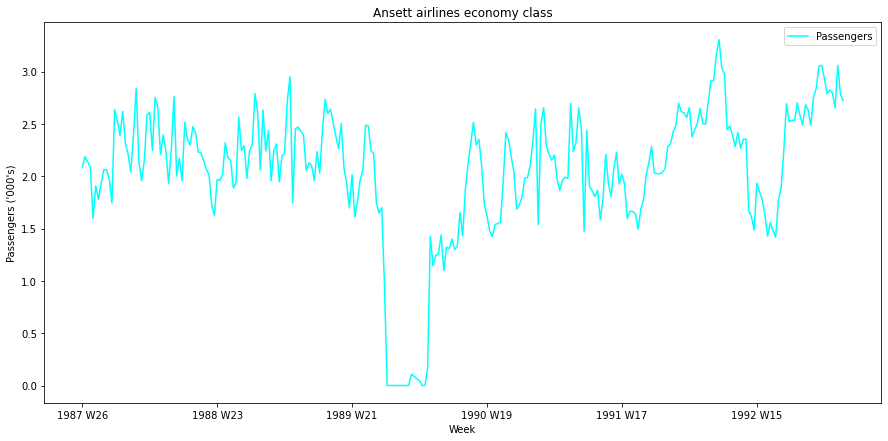

In [3]:
melsyd_economy.plot(x='Date', 
           y='Passengers', 
           figsize=(15,7), 
           xlabel='Week', 
           ylabel='Passengers (\'000\'s)', 
           title='Ansett airlines economy class',
#                     subtitle='Melbourne-Sydney',
           color = 'cyan', 
          )

## Part 2

In [4]:
temps = pd.read_csv('../../data/PBS.csv')
temps.columns

Index(['Index', 'Year', 'Month', 'Concession', 'Type', 'ATC1', 'ATC1_desc',
       'ATC2', 'ATC2_desc', 'Scripts', 'Cost'],
      dtype='object')

In [5]:
def get_month(mtext):
    result=0;
    if mtext == 'Jan': result = 1
    elif mtext == 'Feb': result = 2
    elif mtext == 'Mar': result = 3    
    elif mtext == 'Apr': result = 4    
    elif mtext == 'May': result = 5    
    elif mtext == 'Jun': result = 6    
    elif mtext == 'Jul': result = 7    
    elif mtext == 'Aug': result = 8    
    elif mtext == 'Sep': result = 9    
    elif mtext == 'Oct': result = 10    
    elif mtext == 'Nov': result = 11   
    elif mtext == 'Dec': result = 12
    return result    
    
def extract_month(df):
    df2 = df.map(get_month)
    return df2

In [6]:
a10 = (
    temps
#     .head(1530)
    .drop(['Index'], axis=1)
    .query('ATC2 == \'A10\'')
    .filter(items=['Year', 'Month', 'Concession', 'Type', 'Cost'])
    .assign(Month = lambda x: extract_month(x.Month))
    .assign(Date = lambda x: pd.to_datetime(dict(year=x.Year, month=x.Month, day=1)))
    .drop(['Year', 'Month'], axis=1)
    .set_index('Date')
    .resample('1M')
    .sum()
    .assign(Cost = lambda x: x.Cost/1e6)
#     .sum('Cost')
)
a10.head()

,Cost
Date,
1991-07-31,3.526591
1991-08-31,3.180891
1991-09-30,3.252221
1991-10-31,3.611003
1991-11-30,3.565869


<AxesSubplot:title={'center':'Monthly sales of antidiabetic drugs in Australia'}, xlabel='Date', ylabel="Millions ('000's)">

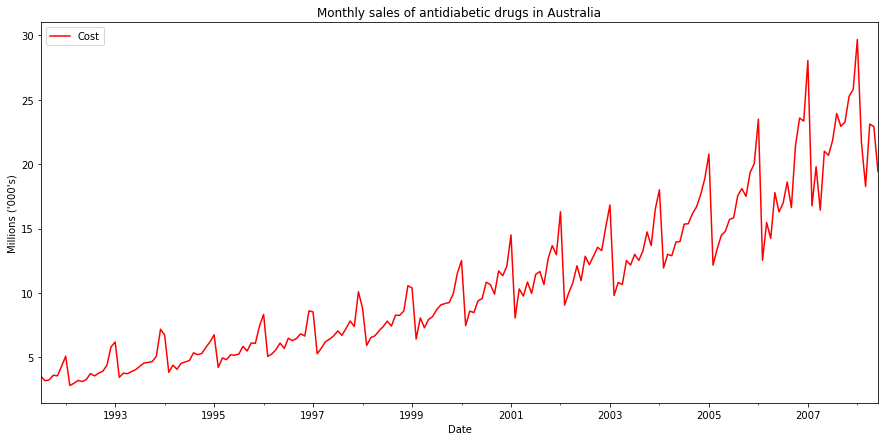

In [7]:
a10.plot(y='Cost', 
           figsize=(15,7), 
           xlabel='Date', 
           ylabel='Millions (\'000\'s)', 
           title='Monthly sales of antidiabetic drugs in Australia',
           color = 'red', 
          )

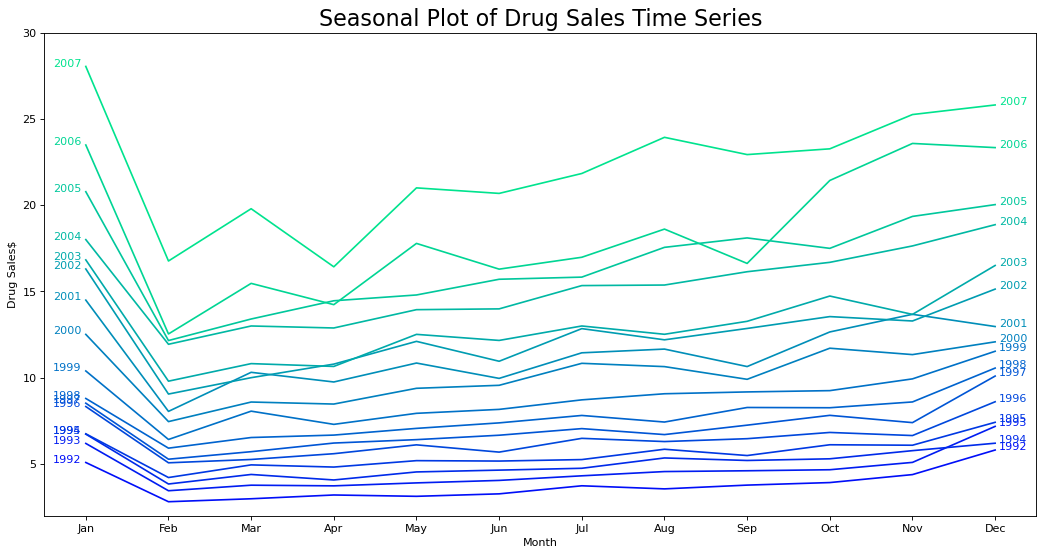

In [10]:
seasonal_plotter(a10, 'Cost')

## Part 3

In [24]:
temps = pd.read_csv('../../data/vic_elec.csv', parse_dates=[['Date', 'Time']])

In [25]:
temps.head()

,Date_Time,Index,Demand,Temperature,Date.1,Holiday
0,2012-01-01 00:00:00,1,4382.825174,21.40,2012-01-01,True
1,2012-01-01 00:30:00,2,4263.365526,21.05,2012-01-01,True
2,2012-01-01 01:00:00,3,4048.966046,20.70,2012-01-01,True
3,2012-01-01 01:30:00,4,3877.563330,20.55,2012-01-01,True
4,2012-01-01 02:00:00,5,4036.229746,20.40,2012-01-01,True


In [29]:
elec_demand = (
    temps
    .set_index('Date_Time')
    .drop(['Index','Date.1'], axis=1)
)
elec_demand.head()

,Demand,Temperature,Holiday
Date_Time,,,
2012-01-01 00:00:00,4382.825174,21.40,True
2012-01-01 00:30:00,4263.365526,21.05,True
2012-01-01 01:00:00,4048.966046,20.70,True
2012-01-01 01:30:00,3877.563330,20.55,True
2012-01-01 02:00:00,4036.229746,20.40,True


KeyError: 'Demand'

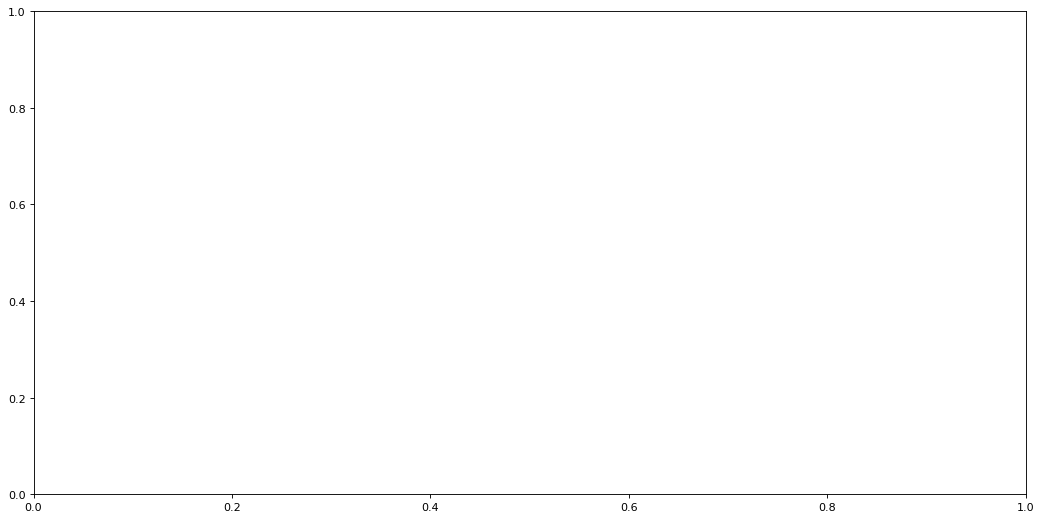

In [30]:
seasonal_plotter(a10, 'Demand')

Timestamp('2012-01-01 00:00:00')